In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
inspector = inspect(engine)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
data = pd.read_sql("select * from Measurement;",engine)

In [42]:
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
meas = session.query(Measurement).first()
# for items in meas:
#     print(items.__dict__)
meas.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20a7113d860>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [11]:
# meas = session.query(Measurement).all()
# for items in meas:
#     print(items.__dict__)

In [12]:
meas = session.query(Measurement)
meas

In [13]:
meas.column_descriptions

[{'name': 'measurement',
  'type': sqlalchemy.ext.automap.measurement,
  'aliased': False,
  'expr': sqlalchemy.ext.automap.measurement,
  'entity': sqlalchemy.ext.automap.measurement}]

In [14]:
inspector=inspector.get_columns("Measurement")
for stuff in inspector:
    print(stuff["name"], stuff["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
engine.execute("SELECT * FROM Measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [16]:
df=session.query(Measurement.date,Measurement.prcp, Measurement.station).\
    order_by(Measurement.date.asc()).all()
df

[('2010-01-01', 0.08, 'USC00519397'),
 ('2010-01-01', 0.28, 'USC00513117'),
 ('2010-01-01', 0.21, 'USC00518838'),
 ('2010-01-01', 0.15, 'USC00519523'),
 ('2010-01-01', 0.15, 'USC00519281'),
 ('2010-01-01', 0.05, 'USC00511918'),
 ('2010-01-01', 0.14, 'USC00516128'),
 ('2010-01-02', 0.0, 'USC00519397'),
 ('2010-01-02', 0.0, 'USC00513117'),
 ('2010-01-02', 0.02, 'USC00518838'),
 ('2010-01-02', 0.0, 'USC00519523'),
 ('2010-01-02', 0.0, 'USC00519281'),
 ('2010-01-02', 0.0, 'USC00511918'),
 ('2010-01-02', 0.0, 'USC00516128'),
 ('2010-01-03', 0.0, 'USC00519397'),
 ('2010-01-03', 0.0, 'USC00513117'),
 ('2010-01-03', 0.0, 'USC00518838'),
 ('2010-01-03', 0.0, 'USC00519523'),
 ('2010-01-03', 0.0, 'USC00519281'),
 ('2010-01-03', 0.0, 'USC00511918'),
 ('2010-01-03', 0.0, 'USC00516128'),
 ('2010-01-04', 0.0, 'USC00519397'),
 ('2010-01-04', 0.0, 'USC00513117'),
 ('2010-01-04', 0.01, 'USC00518838'),
 ('2010-01-04', 0.0, 'USC00519523'),
 ('2010-01-04', 0.0, 'USC00519281'),
 ('2010-01-04', 0.0, 'USC0051

In [17]:
dfyear = [item[0] for item in df]
dfprcp = [item[1] for item in df]
dfstation = [item[2] for item in df]

In [18]:
dataframe=pd.DataFrame({"Year":dfyear,"Percipitation":dfprcp,"Station":dfstation})
dataframe

,Year,Percipitation,Station
0,2010-01-01,0.08,USC00519397
1,2010-01-01,0.28,USC00513117
2,2010-01-01,0.21,USC00518838
3,2010-01-01,0.15,USC00519523
4,2010-01-01,0.15,USC00519281
5,2010-01-01,0.05,USC00511918
6,2010-01-01,0.14,USC00516128
7,2010-01-02,0.00,USC00519397
8,2010-01-02,0.00,USC00513117
9,2010-01-02,0.02,USC00518838


In [19]:
year_2017=dataframe.loc[dataframe["Year"]>("2016-08-22")]
year_2017

,Year,Percipitation,Station
17320,2016-08-23,0.00,USC00519397
17321,2016-08-23,0.15,USC00513117
17322,2016-08-23,0.05,USC00514830
17323,2016-08-23,NaN,USC00517948
17324,2016-08-23,0.02,USC00519523
17325,2016-08-23,1.79,USC00519281
17326,2016-08-23,0.70,USC00516128
17327,2016-08-24,0.08,USC00519397
17328,2016-08-24,2.15,USC00513117
17329,2016-08-24,2.28,USC00514830


In [20]:
year_2017.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Climate Analysis

<BarContainer object of 2230 artists>

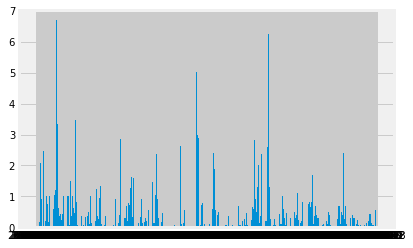

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
x=year_2017["Year"]
y=year_2017["Percipitation"]
plt.bar(x, y,)
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [23]:
# Design a query to show how many stations are available in this dataset?
Stat=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Stat


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Thestation=session.query(Measurement.station, func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
filter_by(station="USC00519281").all()
Thestation


[('USC00519281', 71.66378066378067, 54.0, 85.0)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Thestation=session.query(Measurement.station, func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
filter_by(station="USC00519281").all()
Thestation


[('USC00519281', 71.66378066378067, 54.0, 85.0)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationyear=session.query(Measurement.tobs, func.count (Measurement.tobs)).\
filter_by(station="USC00519281").\
filter(Measurement.date>"2016-08-22").\
group_by(Measurement.tobs).all()
stationyear

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 31),
 (78.0, 22),
 (79.0, 18),
 (80.0, 11),
 (81.0, 4),
 (82.0, 3),
 (83.0, 1)]

In [27]:
dftemp = [item[0] for item in stationyear]
dffrq = [item[1] for item in stationyear]

In [28]:
Stationtemp=pd.DataFrame({"Frequency":dffrq,"Temp":dftemp,})
Stationtemp["Frequency"].sum()

352

<BarContainer object of 25 artists>

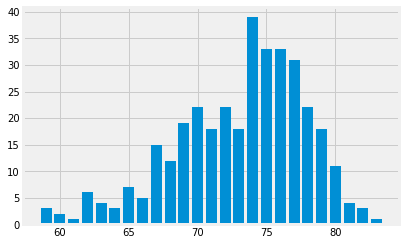

In [29]:
y=Stationtemp["Frequency"]
x=Stationtemp["Temp"]
plt.bar(x, y,)

![precipitation](Images/station-histogram.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [37]:
# Plot the daily normals as an area plot with `stacked=False`
